# <font color ='white'> Corrosion data Processing:
    Taking the .txt file and removing all headers
    Separating OCP and EIS data
    Process and plot OCP data
    Process and plot EIS data (both Nyquist and Bode)</font>

<font color ='#ff3155'> Library imports </font>

In [33]:
import os
import csv 
import matplotlib.pyplot as plt
import numpy as np
from tkinter import *
from tkinter import filedialog
from matplotlib import pylab as pylab
import matplotlib.gridspec as gridspec

<font color ='#ff3155'> Plot parameters: </font>

In [18]:
PLOT_PARAMETERS={'legend.fontsize': 'x-large',
                 'figure.figsize': (5,5),
                 'axes.labelsize': 'medium',
                 'axes.titlesize': 'medium',
                 'xtick.labelsize': 'medium',
                 'ytick.labelsize': 'medium'}
pylab.rcParams.update(PLOT_PARAMETERS)
colors=['#111111', '#aa0000', '#00aa00', '#0000aa', '#aa5500', '#aa5555', '#00aa55' ]

<font color ='#ff3155'> Modules: </font>

In [3]:

def dir_select(start_dir = None):
    '''Directory selection to later read all relevant files from directory
    WARNING: do not forget '/' or '\\' (python vs win) before file name'''
    root=Tk()
    directory=filedialog.askdirectory(initialdir=start_dir)
    root.destroy()
    print(directory)
    return directory

def all_extension_select(directory, extension):
    ''' Creates list with all files pertaining to relevant extension'''
    all_files_names=os.listdir(directory)
#    print(all_files_names , '\n')
    txt_files=list()
    for a in range(len(all_files_names)):
        if all_files_names[a].find(extension)>0:
            txt_files.insert(a, all_files_names[a])
    print(txt_files)
    return txt_files

def textfile_to_linelist(txtfilepath):
    '''Creates a list of strings from the text file !!Give complete file path with directory'''
    with open(txtfilepath,  encoding='utf8', errors='ignore') as f:
        lines=f.readlines()
        f.close()
    return lines

<font color ='#ff3155'> Find all txt files in chosen directory: </font>

In [4]:
directory=dir_select(start_dir='/home/dasilvatousch/PydataWork/')
file_extension='.txt'
txt_files=all_extension_select(directory, file_extension)


/home/dasilvatousch/Bureau/Work/Corrosion/2021_11_12_Corrosion_CMG_Samples
['OCP_1gL.txt', 'EIS_Ref.txt', 'OCP_Ref.txt', 'EIS_1gL.txt', 'EIS_Al.txt', 'OCP_3gL.txt', 'EIS_2gL.txt', 'OCP_2gL.txt', 'OCP_Al.txt', 'EIS_3gL.txt']


<font color ='#ff3155'> Split EIS files from OCP files </font>

In [6]:
OCP_files=[]
EIS_files=[]

for file in txt_files:
    if file.find('OCP')==0 and file.find('Ref')>0:
        OCP_files.append(file)
    if file.find('EIS')==0 and file.find('Ref')>0:
        EIS_files.append(file)
for file in txt_files:
    if file.find('OCP')==0 and file.find('gL')>0:
        OCP_files.append(file)
    if file.find('EIS')==0 and file.find('gL')>0:
        EIS_files.append(file)
for file in txt_files:
    if file.find('OCP')==0 and file.find('Ref')<0 and file.find('gL')<0:
        OCP_files.append(file)
    if file.find('EIS')==0 and file.find('Ref')<0 and file.find('gL')<0:
        EIS_files.append(file)
print(OCP_files)
print(EIS_files)

['OCP_Ref.txt', 'OCP_1gL.txt', 'OCP_3gL.txt', 'OCP_2gL.txt', 'OCP_Al.txt']
['EIS_Ref.txt', 'EIS_1gL.txt', 'EIS_2gL.txt', 'EIS_3gL.txt', 'EIS_Al.txt']


temp=OCP_files[2]
OCP_files[2]=OCP_files[3]
OCP_files[3]=temp
print(OCP_files)

# <font color ='#ff3155'> OCP files data extraction procedure for first file </font>

In [8]:
OCP_lines=textfile_to_linelist(directory + '/' + OCP_files[0])
len(OCP_lines[51:])

3564

<font color ='#ff3155'> Extraction of OCP_headers_str et OCP_units_str contenant respectivement le nom et l'unité des points sous-jascents </font>

In [9]:
OCP_headers_str=OCP_lines[49].split('\t')
OCP_units_str=OCP_lines[50].split('\t')
OCP_headers_str.pop(0)
OCP_units_str.pop(0)
OCP_headers_str.pop(-2)
OCP_units_str.pop(-2)
print(OCP_headers_str)
print(OCP_units_str)

['Pt', 'T', 'Vf', 'Vm', 'Ach', 'Temp\n']
['#', 's', 'V vs. Ref.', 'V', 'V', 'deg C\n']


<font color ='#ff3155'> Split the single str contaning all the points of a row in a list of individual strings with each data column then removing first and second to last entries which do not make sense </font>

In [10]:
OCP_data=[data.split('\t') for data in OCP_lines[51:]]
for data in OCP_data:
    data.pop(0)
    data.pop(-2)

for data in OCP_data[0:5]:
    print(data)
print(len(OCP_data[0]))

['0', '1,01', '-3,89351E-001', '-3,89351E-001', '1,42773E-003', '-327,62\n']
['1', '2,02', '-3,89343E-001', '-3,88924E-001', '1,42916E-003', '-327,62\n']
['2', '3,03', '-3,89301E-001', '-3,88944E-001', '1,43005E-003', '-327,62\n']
['3', '4,04', '-3,89203E-001', '-3,88656E-001', '1,43700E-003', '-327,62\n']
['4', '5,05', '-3,89058E-001', '-3,88548E-001', '1,43513E-003', '-327,62\n']
6


<font color ='#ff3155'> Create 3D np.array : rows=data, column = data "type", depth=data file </font>

In [11]:
Data_array=np.zeros((len(OCP_data),len(OCP_data[0]), len(OCP_files)))
row=0
file_index=0
for data in OCP_data:
    col=0
    for each in data:
        each=each.replace(',', '.')
        each=each.replace('\n', '')
        Data_array[row,col, file_index]=float(each)
        col+=1
    row+=1


In [12]:
print(OCP_headers_str)
print(Data_array[:3,:, 0])

['Pt', 'T', 'Vf', 'Vm', 'Ach', 'Temp\n']
[[ 0.00000e+00  1.01000e+00 -3.89351e-01 -3.89351e-01  1.42773e-03
  -3.27620e+02]
 [ 1.00000e+00  2.02000e+00 -3.89343e-01 -3.88924e-01  1.42916e-03
  -3.27620e+02]
 [ 2.00000e+00  3.03000e+00 -3.89301e-01 -3.88944e-01  1.43005e-03
  -3.27620e+02]]


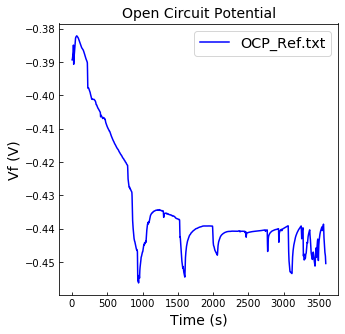

In [19]:
plt.plot(Data_array[:,1, 0], Data_array[:,2, 0], label=OCP_files[0], color='#0000ff')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Vf (V)', fontsize=14)
plt.title('Open Circuit Potential', fontsize=14)
plt.tick_params(direction='in')
plt.legend()
plt.show()

## <font color ='#ff3155'> Above was testing and experimenting with the first file of the OCP list. Below is a loop creating a 3D array with rows for each entry, columns for each data type recorded and depth for each file in the list (possible because all data has the same row x column size) </font> 

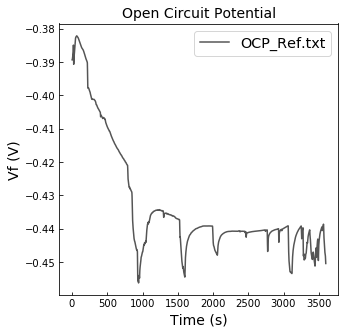

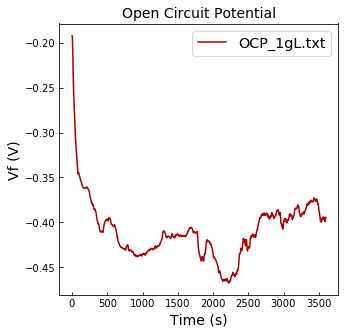

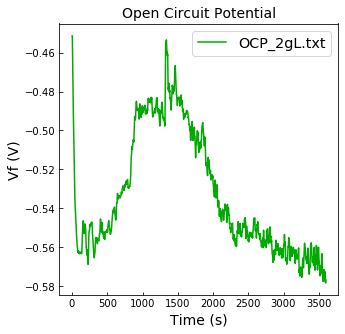

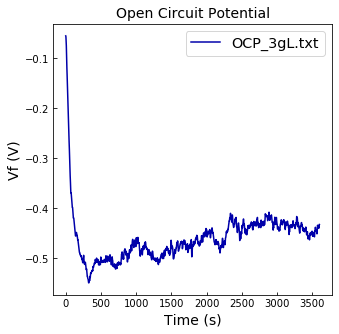

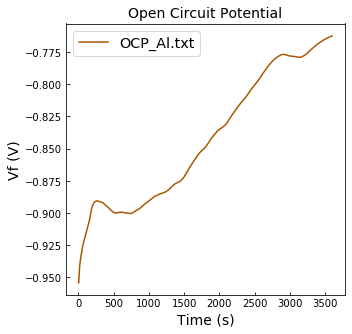

In [105]:
OCP__array=np.zeros((len(OCP_lines[51:]),len(OCP_data[0]), len(OCP_files))) #array initialisation needs the first file to have already been scanned to determine row x columns size 
for i in range(len(OCP_files)): #for each OCP file in chosen folder we need to split the read lines from the txt file into a list with the columns seperated
    OCP__lines=textfile_to_linelist(directory + '/' + OCP_files[i])
    OCP__data=[data.split('\t') for data in OCP__lines[51:]]
    for data in OCP__data:
        data.pop(0) # We pop the empty list
        data.pop(-2)# We pop the column of text (no idea what it is)
    row=0 # Array index initiation
    file_index=i # Easier to read 
    for data in OCP__data: # For row in the data
        col=0 # Array index initiation
        for each in data: # For each entry in the row (loop over the different columns: 0 then 1 then 2 etc...) 
            each=each.replace(',', '.') # txt file contains comas instead of point which are prefered to read floats (decimals)
            each=each.replace('\n', '') # last entry has a \n character to be removed
            OCP__array[row,col, file_index]=float(each) # Filling the np array
            col+=1 # Indexation incrementation for next iteration of the loop which will look at the next data 'column'
        row+=1 # once the first row is processed we increment row index
    '''Plotting individual data entries in their own plot'''
    plt.plot(OCP__array[:,1, file_index], OCP__array[:,2, file_index], label=OCP_files[i], color=colors[i])
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Vf (V)', fontsize=14)
    plt.title('Open Circuit Potential', fontsize=14)
    plt.tick_params(direction='in')
    plt.legend()
    plt.savefig('/home/dasilvatousch/Jupyter/Temp_Plots/'+OCP_files[i][:-4]+'.png', dpi=200)

    plt.show()

##  <font color ='#ff3155'> Above are separated plots, below is superposed plot </font>

In [27]:
colors=['#111111', '#aa0000', '#00aa00', '#0000aa', '#aa5500', '#aa5555', '#00aa55' ]

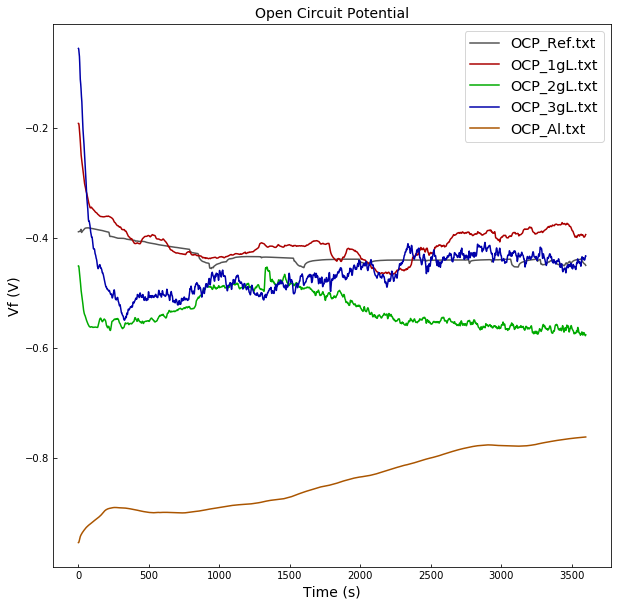

In [106]:
fig = plt.figure(1, (10,10))
for i in range(len(OCP_files)):
    plt.plot(OCP__array[:,1, i], OCP__array[:,2, i], 
             label=OCP_files[i], color=colors[i])
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Vf (V)',  fontsize=14)
plt.title('Open Circuit Potential',  fontsize=14)
plt.tick_params(direction='in')
plt.legend()
plt.savefig('/home/dasilvatousch/Jupyter/Temp_Plots/OCP_merged.png', dpi=200)

plt.show()


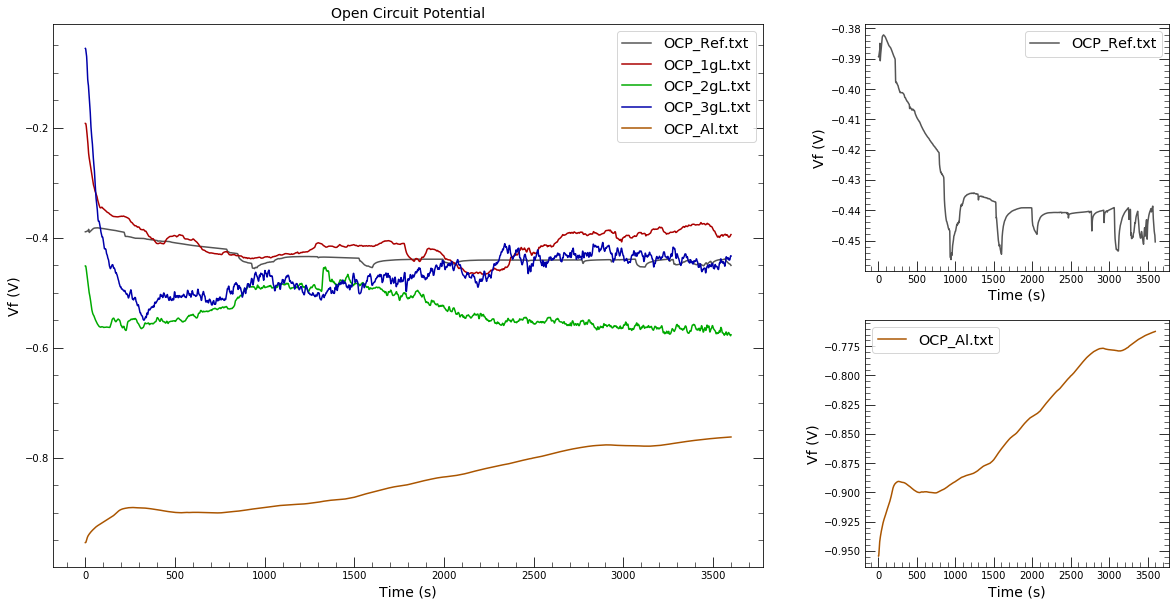

In [107]:
cfig=plt.figure(figsize=(20,10))
gd=gridspec.GridSpec(4,6)
gd.update(wspace=1, hspace=0.5)
panel1=cfig.add_subplot(gd[0:4, 0:4])
for i in range(len(OCP_files)):
    plt.plot(OCP__array[:,1, i], OCP__array[:,2, i], 
             label=OCP_files[i], color=colors[i])
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Vf (V)',  fontsize=14)
plt.title('Open Circuit Potential',  fontsize=14)
plt.minorticks_on()
plt.tick_params(direction='in', which='major', length=10, 
                bottom=True, left=True, right=True, top=False)
plt.tick_params(direction='in', which='minor', length=5, 
                bottom=True, left=True, right=True, top=False)
plt.legend()

panel2=cfig.add_subplot(gd[0:2, 4:6])
plt.plot(OCP__array[:,1, 0], OCP__array[:,2, 0], 
         color=colors[0], label=OCP_files[0])
plt.legend()
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Vf (V)',  fontsize=14)
plt.minorticks_on()
plt.tick_params(direction='in', which='major', length=10, 
                bottom=True, left=True, right=True, top=False)
plt.tick_params(direction='in', which='minor', length=5, 
                bottom=True, left=True, right=True, top=False)

panel3=cfig.add_subplot(gd[2:4, 4:6])
plt.plot(OCP__array[:,1, -1], OCP__array[:,2, -1], 
         color=colors[4], label=OCP_files[-1])
plt.minorticks_on()
plt.legend()
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Vf (V)',  fontsize=14)
plt.tick_params(direction='in', which='major', length=10, 
                bottom=True, left=True, right=True, top=False)
plt.tick_params(direction='in', which='minor', length=5, 
                bottom=True, left=True, right=True, top=False)
plt.savefig('/home/dasilvatousch/Jupyter/Temp_Plots/OCP_merged_Ref_Al_alone.png', dpi=200)

plt.show()

#
# 
# 
# <font color ='#2daefd'> Now let's deal with EIS files </font>

In [42]:
EIS_lines=textfile_to_linelist(directory + '/' + EIS_files[0])

In [43]:
EIS_headers_str=EIS_lines[54].split('\t')
EIS_units_str=EIS_lines[55].split('\t')
EIS_headers_str.pop(0)
EIS_units_str.pop(0)

print(EIS_headers_str)
print(EIS_units_str)

['Pt', 'Time', 'Freq', 'Zreal', 'Zimag', 'Zsig', 'Zmod', 'Zphz', 'Idc', 'Vdc', 'IERange\n']
['#', 's', 'Hz', 'ohm', 'ohm', 'V', 'ohm', '', 'A', 'V', '#\n']


In [44]:
EIS_data=[data.split('\t') for data in EIS_lines[56:]]
for data in EIS_data:
    data.pop(0)
    

for data in EIS_data[0:5]:
    print(data)


['0', '3', '100078,1', '556,6992', '-574,2631', '1', '799,8075', '-45,88974', '1,71329E-008', '-0,4507228', '7\n']
['1', '5', '79453,13', '627,2336', '-641,8964', '1', '897,4703', '-45,66193', '-1,044042E-008', '-0,4507285', '7\n']
['2', '6', '63140,62', '704,1648', '-716,492', '1', '1004,594', '-45,49715', '-8,311488E-009', '-0,4507287', '7\n']
['3', '7', '50203,12', '787,0316', '-799,5511', '1', '1121,918', '-45,45211', '-1,139364E-008', '-0,4507299', '7\n']
['4', '9', '39890,62', '875,7155', '-893,6583', '1', '1251,201', '-45,58101', '-8,358874E-009', '-0,450726', '7\n']


In [46]:
Data_array=np.zeros((len(EIS_data),len(EIS_data[0]), len(EIS_files)))
row=0
file_index=0
for data in EIS_data:
    col=0
    for each in data:
        each=each.replace(',', '.')
        each=each.replace('\n', '')
        Data_array[row,col, file_index]=float(each)
        col+=1
    row+=1
print(EIS_headers_str)
print(Data_array[:5,:, 0])

['Pt', 'Time', 'Freq', 'Zreal', 'Zimag', 'Zsig', 'Zmod', 'Zphz', 'Idc', 'Vdc', 'IERange\n']
[[ 0.000000e+00  3.000000e+00  1.000781e+05  5.566992e+02 -5.742631e+02
   1.000000e+00  7.998075e+02 -4.588974e+01  1.713290e-08 -4.507228e-01
   7.000000e+00]
 [ 1.000000e+00  5.000000e+00  7.945313e+04  6.272336e+02 -6.418964e+02
   1.000000e+00  8.974703e+02 -4.566193e+01 -1.044042e-08 -4.507285e-01
   7.000000e+00]
 [ 2.000000e+00  6.000000e+00  6.314062e+04  7.041648e+02 -7.164920e+02
   1.000000e+00  1.004594e+03 -4.549715e+01 -8.311488e-09 -4.507287e-01
   7.000000e+00]
 [ 3.000000e+00  7.000000e+00  5.020312e+04  7.870316e+02 -7.995511e+02
   1.000000e+00  1.121918e+03 -4.545211e+01 -1.139364e-08 -4.507299e-01
   7.000000e+00]
 [ 4.000000e+00  9.000000e+00  3.989062e+04  8.757155e+02 -8.936583e+02
   1.000000e+00  1.251201e+03 -4.558101e+01 -8.358874e-09 -4.507260e-01
   7.000000e+00]]


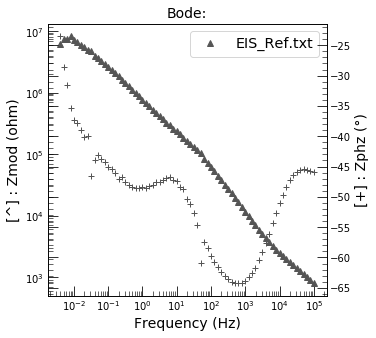

In [102]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(Data_array[:,2, 0], Data_array[:,6, 0],
        label=EIS_files[0], marker='^', linestyle='none', color=colors[0])
ax.set_xlabel('Frequency (Hz)', fontsize=14)
ax.set_ylabel('[^] : Zmod (ohm)',  fontsize=14)
ax.set_yscale('log')
ax.minorticks_on()
ax.tick_params(direction='in', which='major', length=10, 
                bottom=True, left=True, right=True, top=False)
ax.tick_params(direction='in', which='minor', length=5, 
                bottom=True, left=True, right=True, top=False)
plt.legend()
ax2=ax.twinx()
ax2.plot(Data_array[:,2, 0], Data_array[:,7, 0],
         marker='+', linestyle='none', color=colors[0])
ax2.set_ylabel('[+] : Zphz (°)',  fontsize=14)
ax2.minorticks_on()
ax2.tick_params(direction='in', which='major', length=10, 
                bottom=True, left=True, right=True, top=False)
ax2.tick_params(direction='in', which='minor', length=5, 
                bottom=True, left=True, right=True, top=False)
plt.xscale('log')
plt.title('Bode:',  fontsize=14)

plt.show()

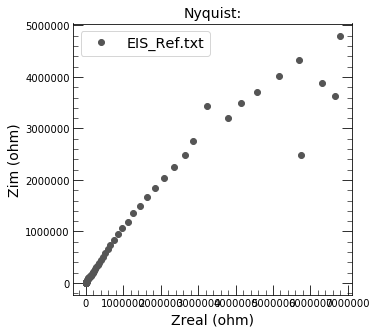

In [103]:
fign = plt.figure(figsize=(5,5))
plt.plot(Data_array[:,3, 0], -Data_array[:,4, 0], 
        color = colors[0],label=EIS_files[0], marker='o', linestyle='none')
plt.xlabel('Zreal (ohm)', fontsize=14)
plt.ylabel('Zim (ohm)', fontsize=14)
plt.title('Nyquist:', fontsize=14)
plt.minorticks_on()
plt.tick_params(direction='in', which='major', length=10, 
                bottom=True, left=True, right=True, top=False)
plt.tick_params(direction='in', which='minor', length=5, 
                bottom=True, left=True, right=True, top=False)
plt.legend()
plt.show()

## <font color ='#2daefd'> Now that the first file has been processed, let's loop on all EIS files and create similar numpy array:</font> 

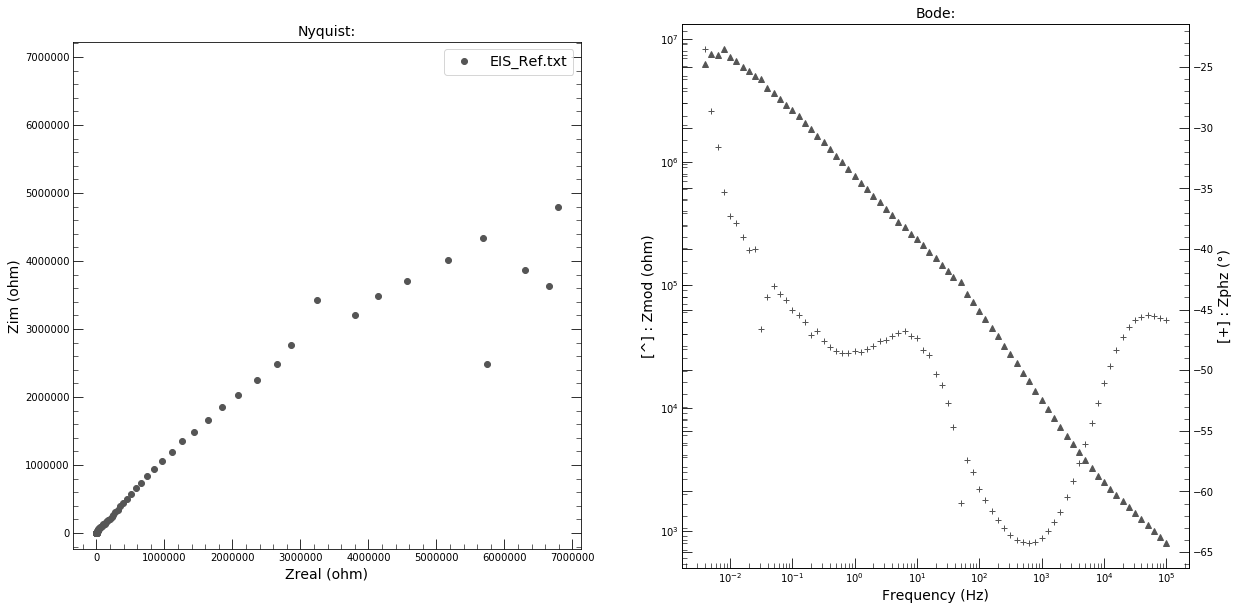

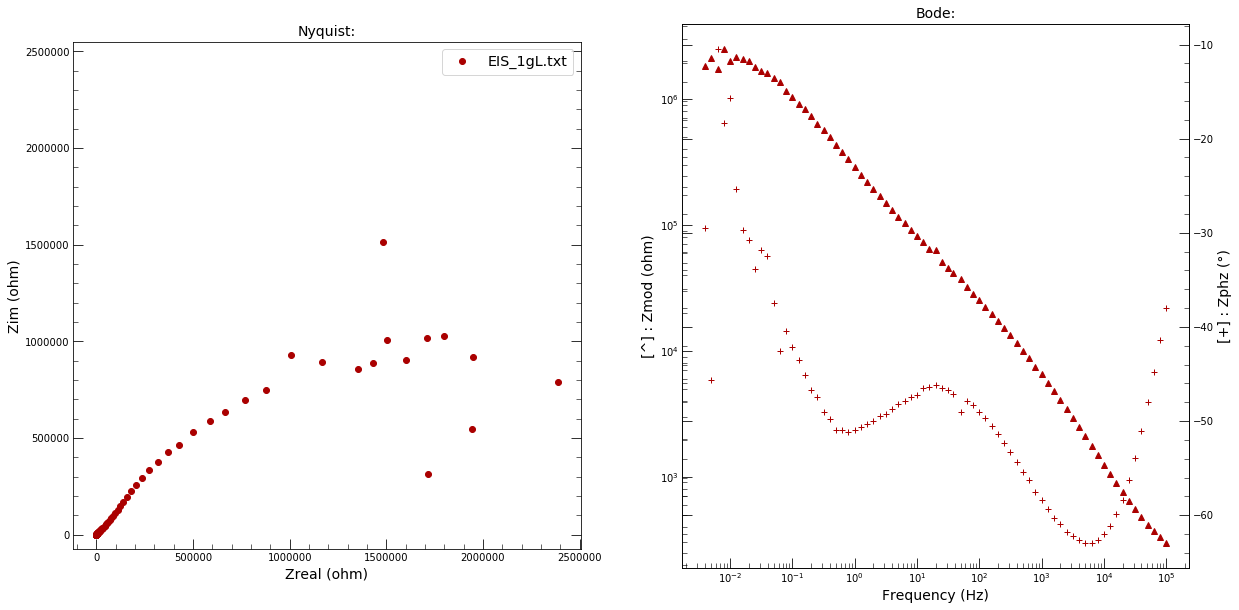

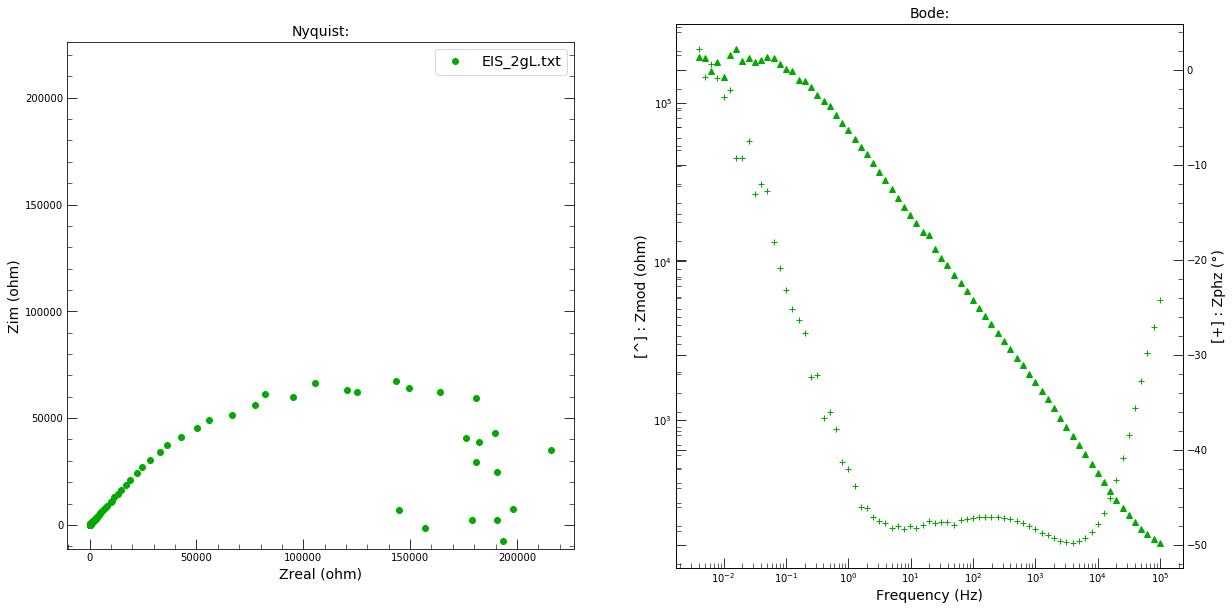

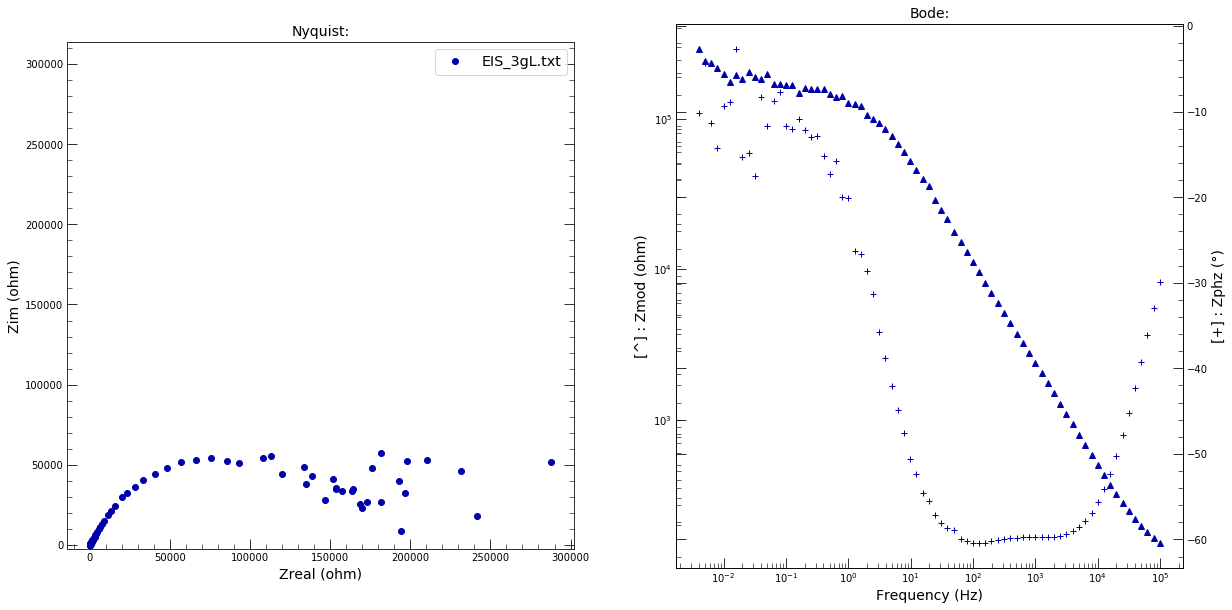

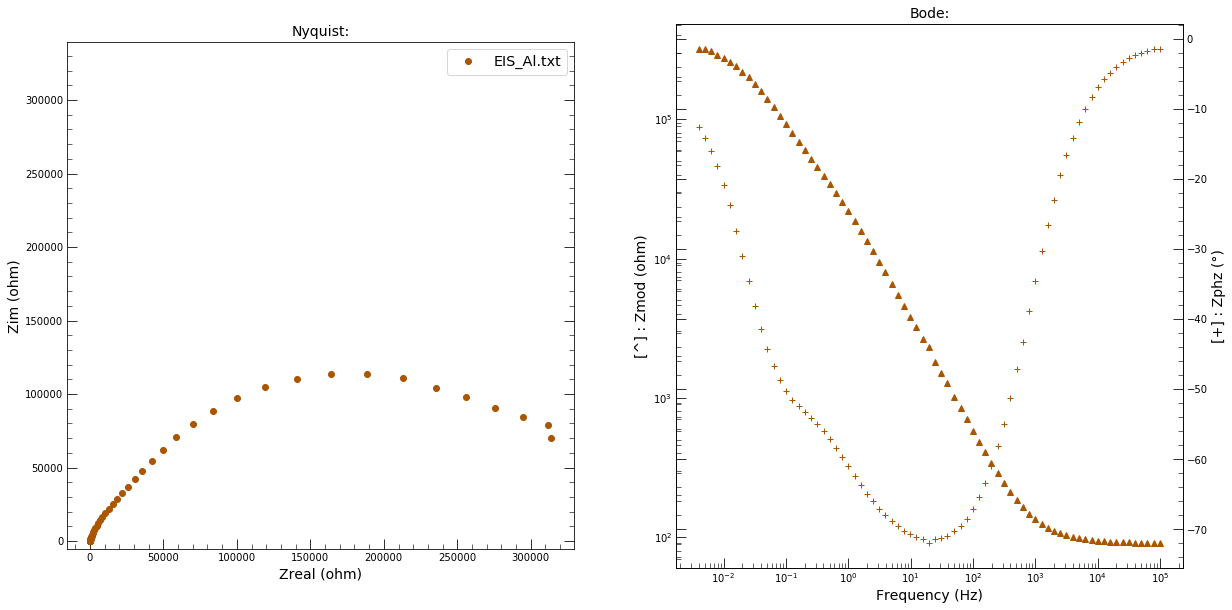

In [113]:
EIS__array=np.zeros((len(EIS_lines[56:]),len(EIS_data[0]), len(EIS_files)))
for i in range(len(EIS_files)):
    EIS__lines=textfile_to_linelist(directory + '/' + EIS_files[i])
    EIS__data=[data.split('\t') for data in EIS__lines[56:]]
    for data in EIS__data:
        data.pop(0)
        
    row=0
    file_index=i
    for data in EIS__data:
        col=0
        for each in data:
            each=each.replace(',', '.')
            each=each.replace('\n', '')
            EIS__array[row,col, file_index]=float(each)
            col+=1
        row+=1
    
    fig, ((ax0, ax1))= plt.subplots(1,2,figsize=(20,10))
    
    
    ax0.plot(EIS__array[:,3, i], -EIS__array[:,4, i], label=EIS_files[i],
        color = colors[i], marker='o', linestyle='none')
    ax0.set_xlabel('Zreal (ohm)', fontsize=14)
    ax0.set_ylabel('Zim (ohm)', fontsize=14)
    ax0.set_title('Nyquist:', fontsize=14)
    ax0.minorticks_on()
    ax0.tick_params(direction='in', which='major', length=10, 
                    bottom=True, left=True, right=True, top=False)
    ax0.tick_params(direction='in', which='minor', length=5, 
                    bottom=True, left=True, right=True, top=False)
    ax0.axis('square')
    ax0.legend()
    
    
    ax1.plot(EIS__array[:,2, i], EIS__array[:,6, i],
            label=EIS_files[i], marker='^', linestyle='none', color=colors[i])
    ax1.set_xlabel('Frequency (Hz)', fontsize=14)
    ax1.set_ylabel('[^] : Zmod (ohm)',  fontsize=14)
    ax1.set_yscale('log')
    ax1.minorticks_on()
    ax1.tick_params(direction='in', which='major', length=10, 
                    bottom=True, left=True, right=True, top=False)
    ax1.tick_params(direction='in', which='minor', length=5, 
                    bottom=True, left=True, right=True, top=False)
    ax1.set_xscale('log')
    
    
    ax2=ax1.twinx()
    ax2.plot(EIS__array[:,2, i], EIS__array[:,7, i],
             marker='+', linestyle='none', color=colors[i])
    ax2.set_ylabel('[+] : Zphz (°)',  fontsize=14)
    ax2.minorticks_on()
    ax2.tick_params(direction='in', which='major', length=10, 
                    bottom=True, left=True, right=True, top=False)
    ax2.tick_params(direction='in', which='minor', length=5, 
                    bottom=True, left=True, right=True, top=False)
    
    ax2.set_title('Bode:',  fontsize=14)
    
    plt.savefig('/home/dasilvatousch/Jupyter/Temp_Plots/'+EIS_files[i][:-4]+'.png', dpi=200)

    plt.show()

## <font color ='#2daefd'> Here are all the plots on a same figure </font>

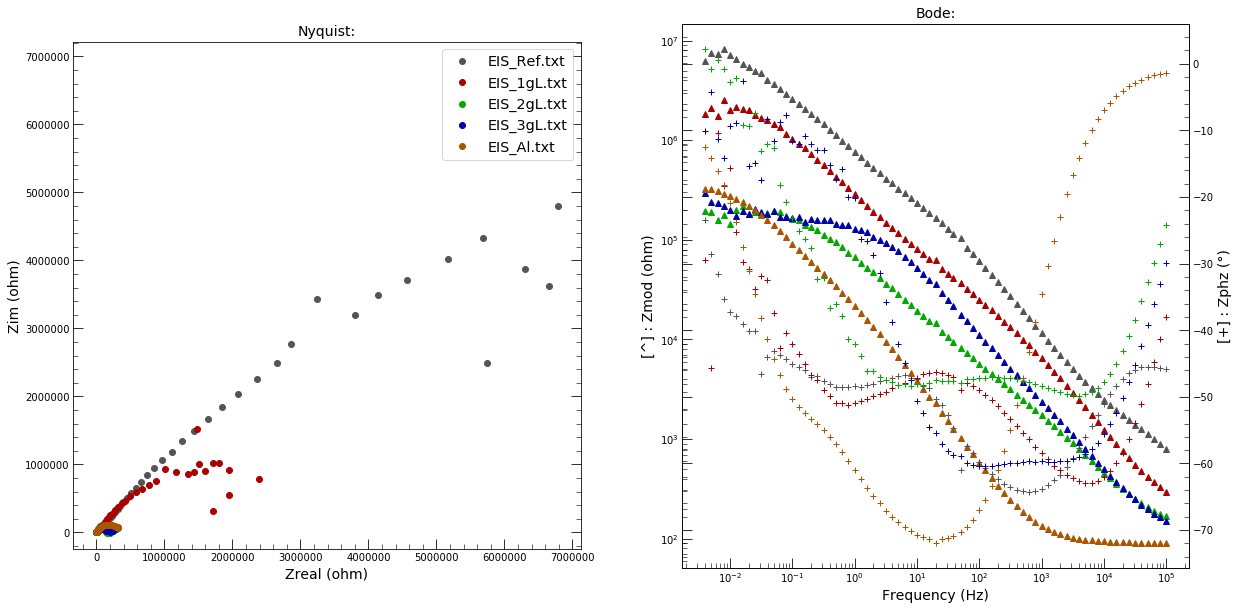

In [109]:
if 1==1:
    fig, ((ax0, ax1))= plt.subplots(1,2,figsize=(20,10))
    
    for i in range(len(EIS_files)):
        ax0.plot(EIS__array[:,3, i], -EIS__array[:,4, i], label=EIS_files[i],
                 color = colors[i], marker='o', linestyle='none')
    ax0.set_xlabel('Zreal (ohm)', fontsize=14)
    ax0.set_ylabel('Zim (ohm)', fontsize=14)
    ax0.axis('square')
    ax0.set_title('Nyquist:', fontsize=14)
    ax0.minorticks_on()
    ax0.tick_params(direction='in', which='major', length=10, 
                    bottom=True, left=True, right=True, top=False)
    ax0.tick_params(direction='in', which='minor', length=5, 
                    bottom=True, left=True, right=True, top=False)
    ax0.legend()
    
    for i in range(len(EIS_files)):
        ax1.plot(EIS__array[:,2, i], EIS__array[:,6, i],
                 label=EIS_files[i], marker='^', linestyle='none', color=colors[i])
    ax1.set_xlabel('Frequency (Hz)', fontsize=14)
    ax1.set_ylabel('[^] : Zmod (ohm)',  fontsize=14)
    ax1.set_yscale('log')
    ax1.minorticks_on()
    ax1.tick_params(direction='in', which='major', length=10, 
                    bottom=True, left=True, right=True, top=False)
    ax1.tick_params(direction='in', which='minor', length=5, 
                    bottom=True, left=True, right=True, top=False)
    ax1.set_xscale('log')
    
    
    ax2=ax1.twinx()
    for i in range(len(EIS_files)):
        ax2.plot(EIS__array[:,2, i], EIS__array[:,7, i],
                 marker='+', linestyle='none', color=colors[i])
    ax2.set_ylabel('[+] : Zphz (°)',  fontsize=14)
    ax2.minorticks_on()
    ax2.tick_params(direction='in', which='major', length=10, 
                    bottom=True, left=True, right=True, top=False)
    ax2.tick_params(direction='in', which='minor', length=5, 
                    bottom=True, left=True, right=True, top=False)
    
    ax2.set_title('Bode:',  fontsize=14)
    plt.savefig('/home/dasilvatousch/Jupyter/Temp_Plots/EIS_merged.png', dpi=200)

    plt.show()

# Nyquist : Zoom on 0 : 300000 ohm

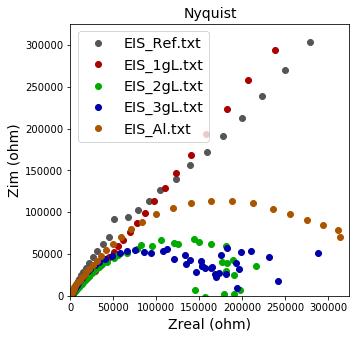

In [110]:
fiig=plt.figure(figsize=(5,5))
for i in range(len(EIS_files)):
    plt.plot(EIS__array[:,3, i], -EIS__array[:,4, i], label=EIS_files[i], linestyle='none',marker='o', color=colors[i])
plt.xlabel('Zreal (ohm)', fontsize=14)
plt.ylabel('Zim (ohm)', fontsize=14)
plt.xlim(-10,325000)
plt.ylim(-10,325000)
plt.title('Nyquist', fontsize=14)
plt.legend()
plt.savefig('/home/dasilvatousch/Jupyter/Temp_Plots/EIS_merged_zoom.png', dpi=200)
plt.show()

# <font color ='#2daefd'> Here are the Bode plots </font>

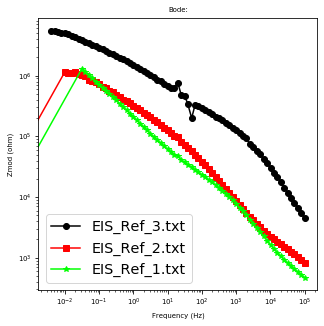

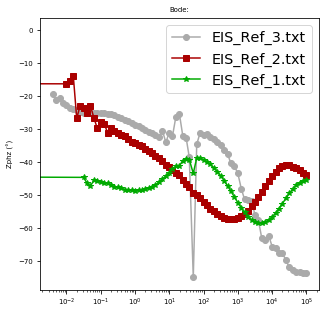

In [27]:

markers_ = ['o', 's' , '*' , 'D', 'v', '^', '<', '>', '1', 'H']
Zmod_color=['#000000', '#ff0000', '#00ff00', '#0000ff', '#ffaa00','#ffaaaa', '#00ffaa' ]
Zphz_color=['#aaaaaa', '#aa0000', '#00aa00', '#0000aa', '#aa5500', '#aa5555', '#00aa55' ]
for i in range(3):  
    
    plt.plot(EIS__array[:,2, i], EIS__array[:,6, i], color=Zmod_color[i], label=EIS_files[i], marker=markers_[i])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Zmod (ohm)', color='black')
plt.yscale('log')
plt.xscale('log')
plt.title('Bode:')
plt.legend()
plt.show()
   
for i in range(3):    
    plt.plot(EIS__array[:,2, i], EIS__array[:,7, i],color=Zphz_color[i], label=EIS_files[i], marker=markers_[i])
    plt.ylabel('Zphz (°)', color='black')

plt.xscale('log')
plt.title('Bode:')
plt.legend()
plt.show()

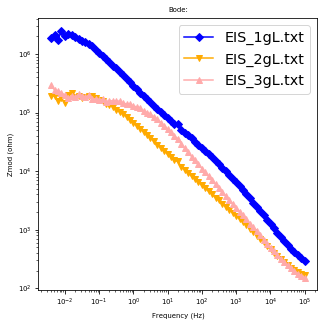

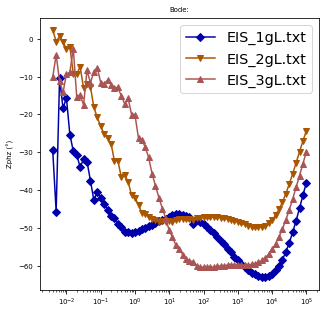

In [28]:
for i in range(3):  
    
    plt.plot(EIS__array[:,2, i+3], EIS__array[:,6, i+3], color=Zmod_color[i+3], label=EIS_files[i+3], marker=markers_[i+3])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Zmod (ohm)', color='black')
plt.yscale('log')
plt.xscale('log')
plt.title('Bode:')
plt.legend()
plt.show()
   
for i in range(3):    
    plt.plot(EIS__array[:,2, i+3], EIS__array[:,7, i+3],color=Zphz_color[i+3], label=EIS_files[i+3], marker=markers_[i+3])
    plt.ylabel('Zphz (°)', color='black')

plt.xscale('log')
plt.title('Bode:')
plt.legend()
plt.show()